In [36]:
    #impact of country of origin for driver (Keanu)

    #Drivers Per country for over the past 50 years
    #The countries that seem to have the most drivers seem to be the ones that have bigger populations and larger ecomomies  like the US and big European countries.
    
# Initial imports
import os
import requests
import pandas as pd
import numpy as np

/opt/anaconda3/envs/project-1/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/project-1/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/opt/anaconda3/envs/project-1/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


'https://en.wikipedia.org/wiki/List_of_Formula_One_drivers'

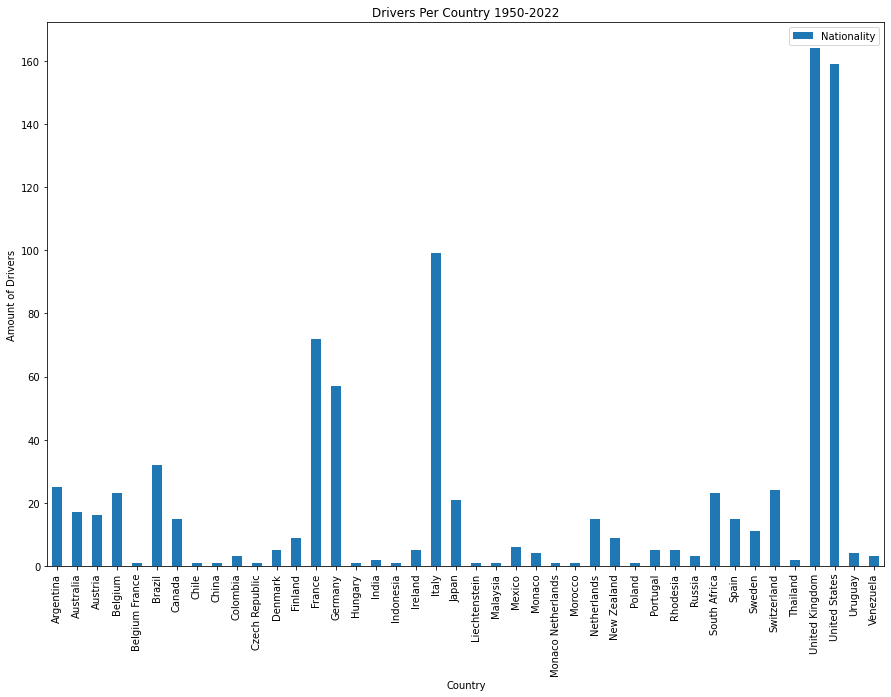

In [37]:
#function
def drivers_per_country (link_country = 'https://en.wikipedia.org/wiki/List_of_Formula_One_drivers'):
    
    list_of_formula_one_drivers = pd.read_html(link_country)
    drivers_country = List_of_formula_one_drivers[2]
    
    
    #DATA SORTING AND CLEANING
    #sortby naationailtiy 
    country = drivers_country.groupby('Nationality')

    
    #refine data to just these columns 
    #just name and nationality for drivers in a table/df, renaming
    name_nationality = drivers_country[['Driver Name', 'Nationality']]
    name_nationality.rename(columns = {"Driver Name": "driver_name"}, inplace=True)

    
    #give numeric value for each driver (one diver equals 1 driver)
    name_nationality['count'] = 1
    name_nationality = name_nationality.drop('driver_name', 1) #droppping diver name colunm leaving us just with nationality and a driver unit(1 driver name = 1 driver)


    #cleaning data
    #Nationality splitting counts from nationality column with a function
    def update_data(value_, new_value):
        index = name_nationality[name_nationality['Nationality']==value_].index.values
        name_nationality.iloc[index, name_nationality.columns.get_loc('Nationality')] = new_value
        return index

    update_data(value_='Argentina[50]', new_value='Argentina')
    update_data(value_='Morocco[43]', new_value='Morocco')
    update_data(value_='Argentina[50]', new_value='Argentina')
    update_data(value_='East Germany, West Germany[f]', new_value='Germany')
    update_data(value_='East Germany', new_value='Germany')
    update_data(value_='West Germany', new_value='Germany')
    update_data(value_='Rhodesia and Nyasaland', new_value='Rhodesia')

    #dropping rows that have non relevant incorrect data
    #index_nationality = name_nationality[name_nationality['Nationality']=='Nationality'].index.values
    name_nationality = name_nationality.drop([name_nationality.index[865], name_nationality.index[505]])
    
    
    #VISUALISATION
    #sum all drivers (units) into their nationalities 
    name_nationality = name_nationality.apply(name_nationality.value_counts).fillna(0)
    name_nationality.sort_values('Nationality')
    name_nationality = name_nationality.drop('count', 1)
    name_nationality = name_nationality.drop(name_nationality.index[0])  #weird 1 in the countries column with a 0 for count, deleting

    #plot bar chart
    bar_plot_drivers_per_country = name_nationality.plot.bar(xlabel='Country', ylabel='Amount of Drivers', title='Drivers Per Country 1950-2022', figsize=(15,10))
    bar_plot_drivers_per_country
    return link_country


drivers_per_country()